In [1]:
import descartes
import geopandas as gpd
import pandas as pd
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
houston_data = gpd.read_file('houston_lu.geojson')

In [3]:
noshape_mask = houston_data.geometry.apply(lambda x: type(x) is not Polygon and
                                           type(x) is not MultiPolygon)
print (houston_data.shape[0] - noshape_mask.sum())
print ((houston_data.shape[0] - noshape_mask.sum()) / houston_data.shape[0])

1473956
0.9252961161513563


In [4]:
# find counties that have parcels with no location data
print(houston_data.loc[noshape_mask, 'COUNTY'].unique())
print(houston_data.loc[~noshape_mask, 'COUNTY'].unique())

['MONTGOMERY' 'FORT BEND' 'GLI' ' ']
['HARRIS' 'MONTGOMERY' 'GLI' ' ' 'WALLER']


In [ ]:
f, ax = plt.subplots(1, figsize=(30, 30))
ax = houston_data.plot(ax=ax, column='STATE_CLASS', legend=True)
ax.legend(loc="lower left")
plt.axis('equal')
plt.show()

In [5]:
get_coords = lambda geometry: gpd.GeoSeries(geometry.centroid.coords[:][0])
coords = houston_data[~houston_data.geometry.isna()].geometry.apply(get_coords)
coords.columns = ['lon', 'lat']

In [6]:
houston_coords = pd.concat([houston_data, coords], axis=1)

In [7]:
# sanity check to make sure that things merged correctly
(~houston_coords.loc[houston_coords.geometry.isna(), ['lon', 'lat']].isna()).sum()

lon    0
lat    0
dtype: int64

In [ ]:
houston_coords.drop('geometry', axis=1).to_csv('houston_lu.csv', index=False)

In [15]:
urb_houston_coords = houston_coords[houston_coords.lat.between(29.652456, 29.832867) & 
                                    houston_coords.lon.between(-95.562812, -95.228056)]
# urb_houston_coords = houston_coords[houston_coords.lat.between(29.677686, 29.813910) & 
#                                     houston_coords.lon.between(-95.501144, -95.265147)]

No handles with labels found to put in legend.


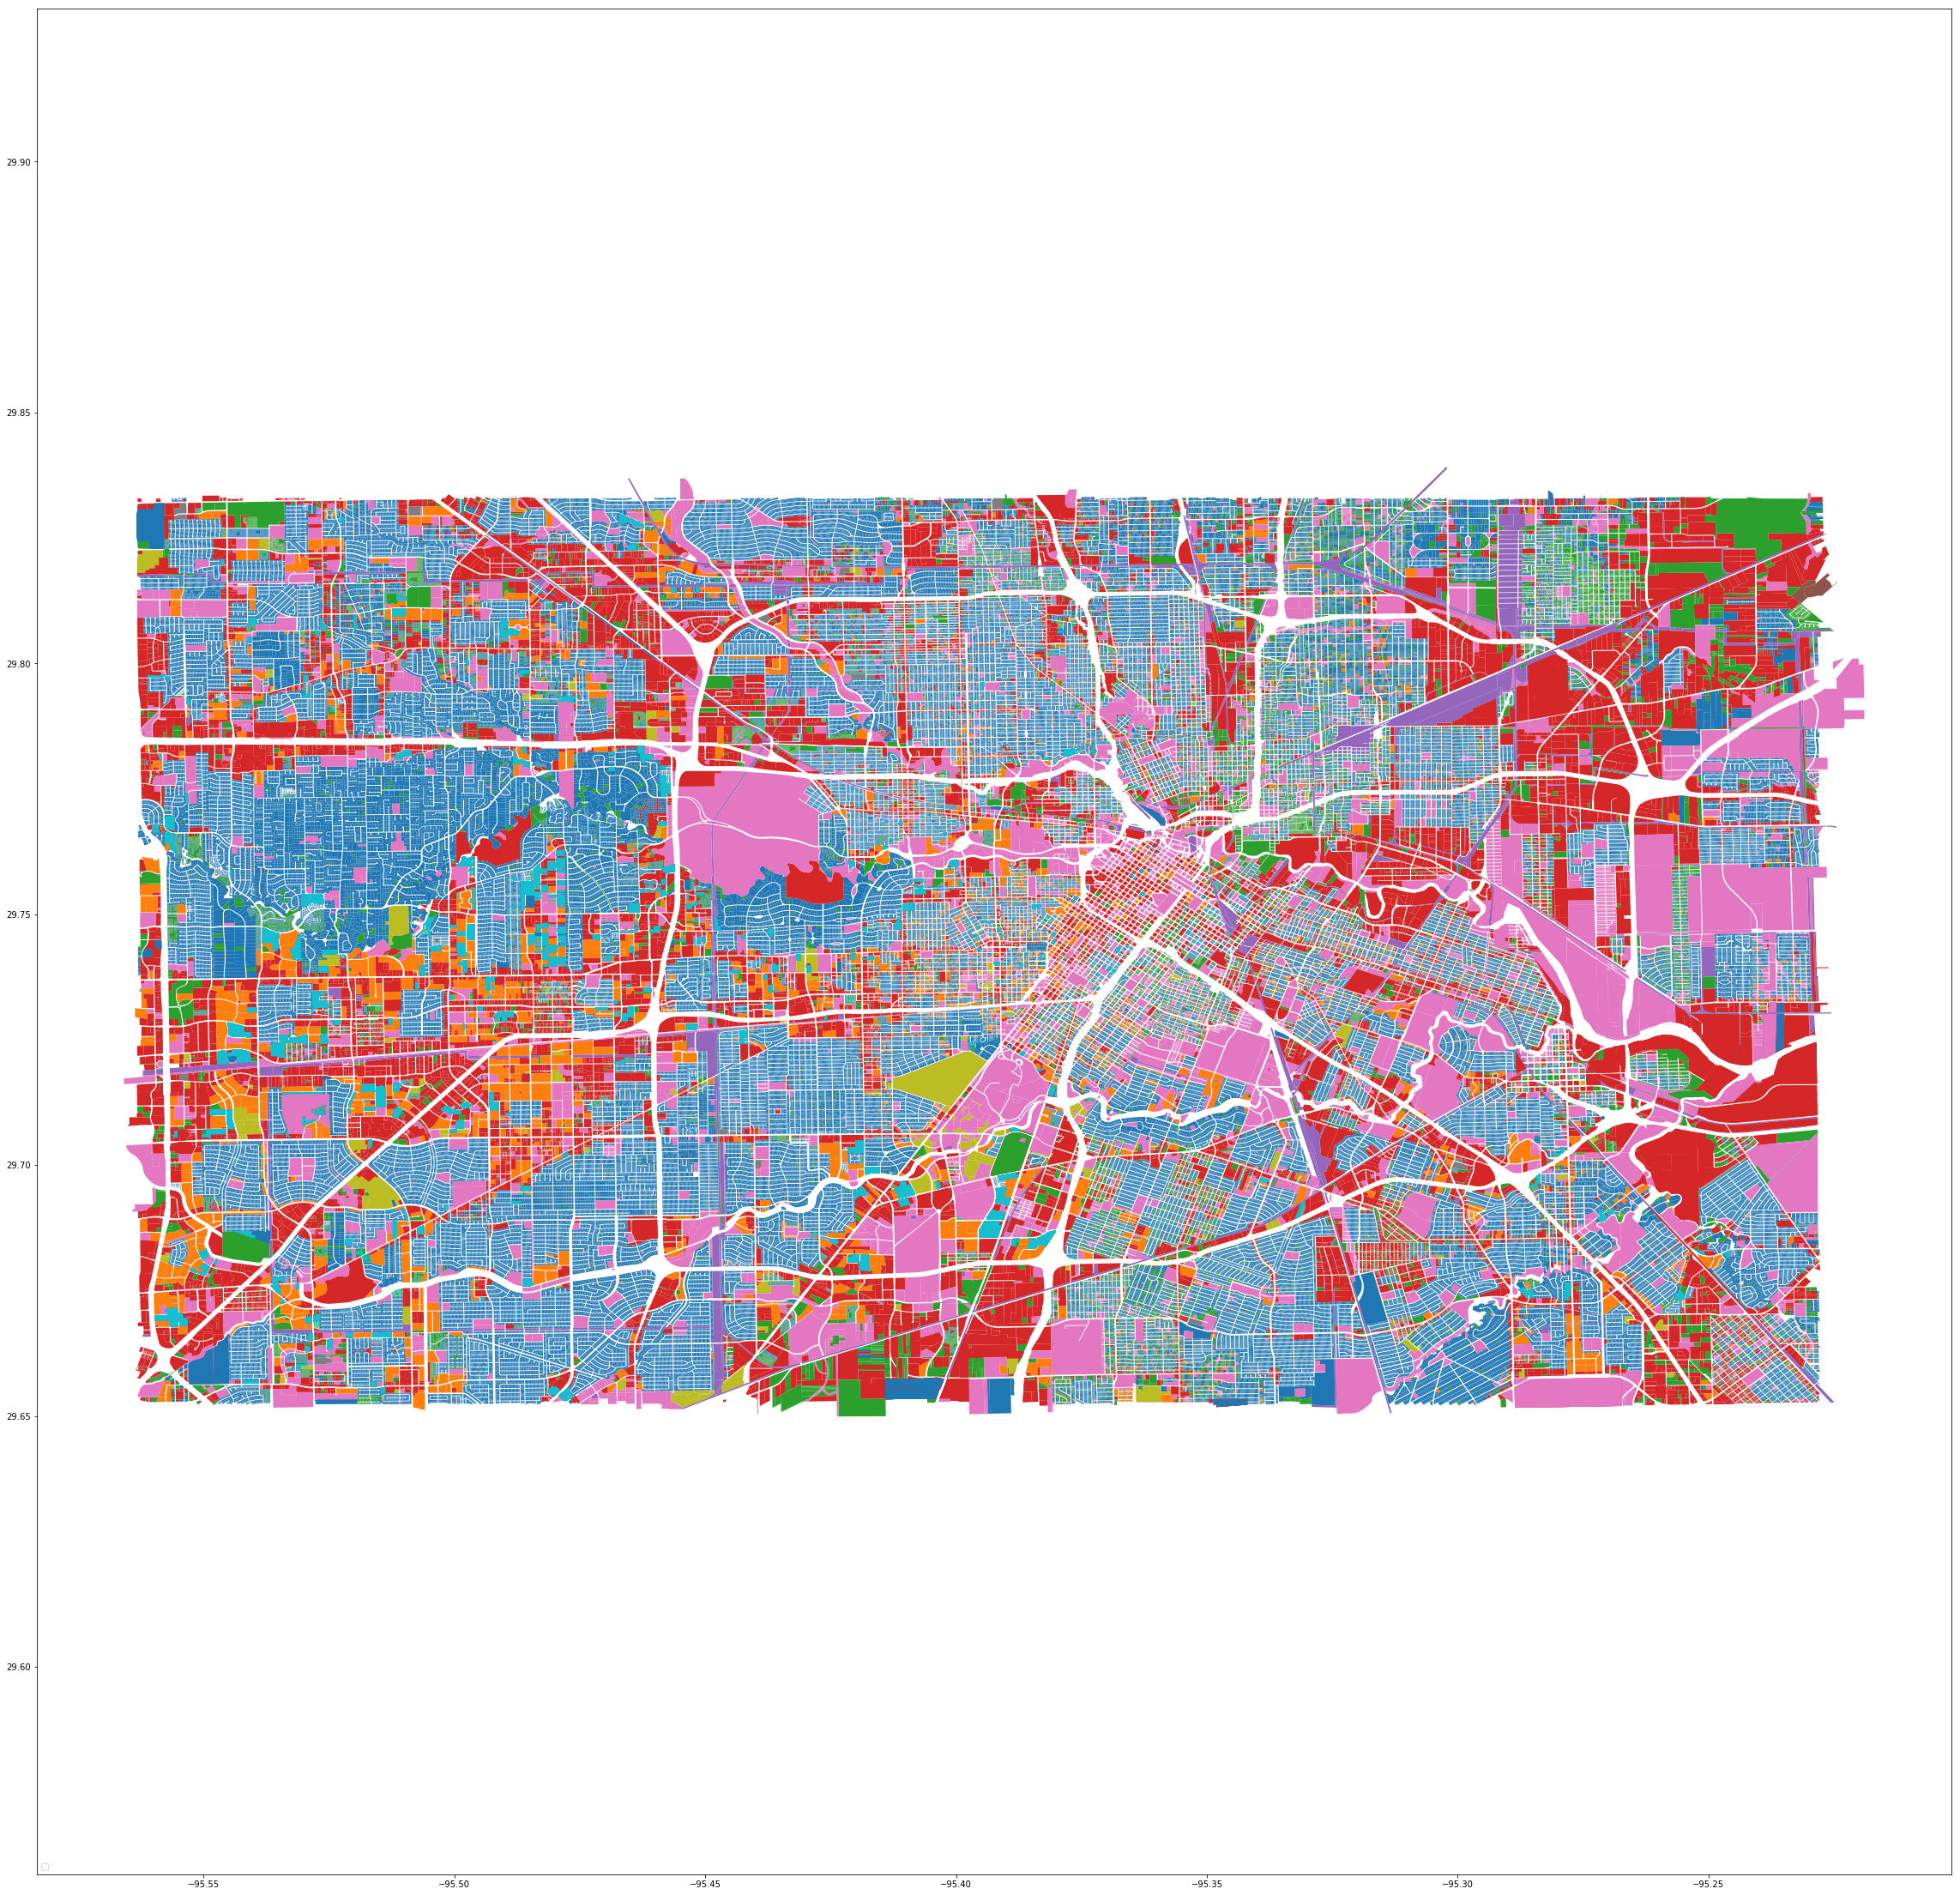

In [16]:
f, ax = plt.subplots(1, figsize=(40, 40))
ax = urb_houston_coords.plot(ax=ax, column='STATE_CLASS', legend=True)
ax.legend(loc="lower left")
plt.axis('equal')
plt.show()

In [17]:
urb_houston_coords.shape

(372546, 14)

In [18]:
urb_houston_coords.drop('geometry', axis=1).to_csv('urb_houston_lu.csv', index=False)